<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Categorical Cross-Entropy Loss**


Estimated time needed: **45** minutes


In this lab, we are going to use the MNIST hand-written digits dataset as a motivating example to understand categorical cross-entropy loss.


<h1> House Number Detection </h1></s>

You have been tasked with building a model that can recognize house numbers from arbitrary street-view images. You are given a set of images of single-digit house numbers engraved into slates or wall surfaces. The images vary in size and color. In this lab, we are going to use the MNIST hand-written digits dataset as a motivating example to understand the __softmax function__, __one-hot encoding__, and __categorical cross-entropy loss__. The MNIST hand-written dataset has 10 classes, each representing a digit from 0-9. We will attempt to build a multi-class classification model that will identify which digit is present in the image. 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/house_number.jpg" style="width: 30%">

<!-- Original Source: https://slate.com/human-interest/2020/06/a-quest-to-catalogue-every-single-house-number-in-one-suburban-zip-code.html --> 


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="https://https://#Categorical Cross-Entropy">Categorical Cross-Entropy</a>
        <ol>
            <li><a href="https://#Softmax Activation Function">Softmax Activation Function</a></li>
            <li><a href="https://#One-Hot Encoding">One-Hot Encoding</a></li>
            <li><a href="#Categorical Cross-Entropy">Categorical Cross-Entropy</a></li>
        </ol>
    </li>
    <li><a href="https://#Binary vs. Multi-Class Classification">Binary vs. Multi-Class Classification</a>
        <ol>
            <li><a href="https://#Binary Classification">Binary Classification</a></li>
            <li><a href="https://#Multi-Class Classification">Multi-Class Classification</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Example: MNIST Hand-Written Digits">Example: MNIST Hand-Written Digits</a> </li>
    <li>
        <a href="https://#Example: Single-Digit House Number Recognition"> Example: Single-Digit House Number Recognition</a> </li>
    <li><a href="https://#Exercises">Exercises</a>
        <ol>
            <li><a href="https://#Exercise 1 - Loading and plotting the images">Exercise 1 - Loading and plotting the images</a></li>
            <li><a href="https://#Exercise 2 - Preparing the data">Exercise 2 - Preparing the data</a></li>
            <li><a href="https://#Exercise 3 - One-hot encoding">Exercise 3 - One-hot encoding</a></li>
            <li><a href="https://#Exercise 4 - Build model architecture">Exercise 4 - Build model architecture</a></li>
            <li><a href="https://#(Optional) Exercise 5 - Sparse Categorical Cross-Entropy">Sparse Categorical Cross-Entropy</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab you will be able to:

*   **Understand** what categorical cross-entropy is, and how it works with the Softmax activation function.
*   **Build** simple CNN models for binary and multi-class classification.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for loading datasets.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (like Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip install mlxtend` in the following code cell.


The following required libraries are **not** pre-installed in the Skills Network Labs environment. **You will need to run the following cell** to install them. **Please RESTART KERNEL after installation,**.


In [1]:
%%capture

!pip install mlxtend
!pip install --upgrade tensorflow

### Importing Required Libraries


In [2]:
import cv2
from urllib.request import urlopen
from PIL import Image
import IPython
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd, numpy as np
from keras.datasets import mnist, fashion_mnist
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
print(tf.__version__)
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-04 15:48:43.192831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 15:48:43.470601: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 15:48:43.475790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-04 15:48:43.475835: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2.11.0


### Defining Helper Functions

*Use this section to define any helper functions to help the notebook's code readability:*


In [3]:
def generate_multiclass_blobs(num_samples_total, training_split, cluster_centers, num_classes, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
    categorical_targets = to_categorical(targets)
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = categorical_targets[training_split:]
    Targets_testing = categorical_targets[:training_split].astype(np.int32)
    return X_training, Targets_training, X_testing, Targets_testing


def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

## Categorical Cross-Entropy


When working on a machine learning problem, we use loss functions to optimize our models during training where a common objective is to minimize the loss function.

Cross-entropy is a widely used loss or cost function, that is used to optimize classification models. Before delving into cross-entropy, let us first cover the prerequisites by learning about a common activation function called Softmax.


### Softmax Activation Function


Activation functions are transformations applied to the output from CNNs before loss computations.


The Softmax activation function is typically placed as the last layer in a neural network and used to normalize the output of a network to a probability distribution over predicted output classes.

It does so by scaling numbers/logits into probabilities for each possible outcome or class present in our dataset. The resulting probabilities in the vector sum up to one.

Mathematically, Softmax is defined as follows:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/softmax.png" style="width: 30%">


Here, $\overrightarrow{{z}}$ is an input vector to the Softmax function $\sigma$.

$\overrightarrow{{z}}\_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf.

$\overrightarrow{{z}}_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf. 

$e^{z_i}$ is a standard exponential function applied on the $i$th element of $z$, and the denominator is a normalizing term (L1-norm) to ensure the result is a valid probability distribution, that is, sums up to 1, and values are within the 0 - 1 range.


Exponential is a steeply increasing function; that is, it increases the difference between outputs. In the final output, the largest element (which dominates the norm) is normalized to a value close to 1, while all the other elements end up being close to 0. Not only does the resulting vector show the winning class, but it also retains the original order of values.


Another important point to note is that Softmax is not affected by negative values, as the exponent of any value is always a positive value.


Let us walk through an example to understand Softmax.


Imagine you are building a CNN model to classify an image as a dog, cat, fish, or horse. The fully-connected layer of your CNN gives a vector of logits. You pass the vector through the Softmax function above to obtain probabilities.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce_diag.png)


### One-Hot Encoding


The ground truth is typically presented in form of categorical data; that is, a given image is categorized into one of these classes: dog, cat, fish, or horse.


For categorical variables where no ordinal relationships exist, we can perform one-hot encoding to represent each class. This is best explained through an example.

In our case, we will have four classes, and these are the corresponding one-hot encoded labels:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/ohe_labels.png" style="width: 50%">


So in one-hot encoding, we represent labels with a binary variable where for every given class, we have the value 1 for the position corresponding to that particular class and 0 elsewhere (that is, 100% probability of belonging to that class).


### Back to Categorical Cross-Entropy


Now that we have converted the logits to output probabilities, we need to measure how good they are; that is, measure the distance from the truth values.


For instance, in the example above, the desired output is [1,0,0,0], but the model outputs [0.775,0.116,0.039,0.070].


The categorical cross-entropy is mathematically defined as follows:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce.png" style="width: 30%">


We can use the formula above to compute the cross-entropy loss. When training our model, we iteratively update the weights to minimize the cross-entropy loss. 

The Softmax is continuously differentiable, and this property makes it easy to compute the derivative of the loss function and, accordingly, adjust the model weights in each iteration to minimize the loss function.

In the next iteration, if our $$L\_{CE}$$ is lower than the current one, we say that the model is *learning*.


## Binary vs. Multi-Class Classification


Now, let us do a quick review of binary and multi-class classification. Binary classification tasks require that all examples be assigned to one of two classes, whereas in multi-class classification, examples can belong to more than two classes.

For binary classification problems, we have a final layer with a single node and a sigmoid activation function. It can map the output vector from a CNN to values between 0 and 1 before loss computations. The sigmoid function is denoted using the following formula:

$$\sigma(x) = 1/(1+e^{-x})$$


Let's see binary classification and multi-class classification in action.


### Binary Classification


Using a helper function defined at the beginning of the notebook, we will use the `make_blobs()` function from `sklearn` to generate isotropic Gaussian blobs for classification.

We will create a data set with 1000 samples, and use 750 of those samples for training a simple CNN model.


Let us define a few more configuration options.


*   **num_samples**: refers to the total number of samples in our dataset
*   **test_split**: refers to the number of samples to be used for testing
*   **cluster_centers**: we define 2 centers for our isotropic Gaussian blobs
*   **num_classes**: we have 2 classes
*   **loss_function_used**: since this is a binary classification problem, we use binary cross-entropy loss


In [4]:
num_samples = 1000
test_split = 250
cluster_centers = [(15,0), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = BinaryCrossentropy(from_logits=True)

In [5]:
X_training, Targets_training, X_testing, Targets_testing=generate_binary_blobs(num_samples, test_split, loss_function_used)


We can take look at one of the samples.


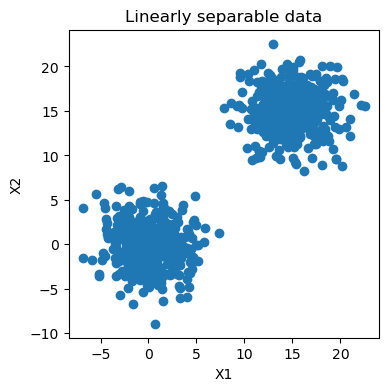

In [6]:
plt.figure(figsize=(4, 4))
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We will build a simple CNN model with two hidden layers, that uses sigmoid as the activation function, and binary cross-entropy as the loss function. Let's define the architecture of our model:


In [7]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

2024-04-04 15:48:46.158169: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-04 15:48:46.158239: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-04 15:48:46.158281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-surbhit3812): /proc/driver/nvidia/version does not exist
2024-04-04 15:48:46.158599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/keras/backend.py:5677: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits, "Sigmoid", "binary_crossentropy"


120/120 [==============================] - 2s 11ms/step - loss: 1.0096 - accuracy: 0.4533 - val_loss: 0.1325 - val_accuracy: 0.4667
Epoch 2/30
120/120 [==============================] - 1s 10ms/step - loss: -0.4704 - accuracy: 0.4800 - val_loss: -1.1457 - val_accuracy: 0.4733
Epoch 3/30
120/120 [==============================] - 1s 10ms/step - loss: -1.7946 - accuracy: 0.4867 - val_loss: -2.5983 - val_accuracy: 0.4400
Epoch 4/30
120/120 [==============================] - 1s 5ms/step - loss: -3.3826 - accuracy: 0.4717 - val_loss: -4.5537 - val_accuracy: 0.4533
Epoch 5/30
120/120 [==============================] - 0s 4ms/step - loss: -5.5937 - accuracy: 0.4817 - val_loss: -7.3494 - val_accuracy: 0.4467
Epoch 6/30
120/120 [==============================] - 0s 4ms/step - loss: -8.9581 - accuracy: 0.4783 - val_loss: -11.5382 - val_accuracy: 0.4467
Epoch 7/30
120/120 [==============================] - 0s 4ms/step - loss: -13.9782 - accuracy: 0.4800 - val_loss: -17.6355 - val_accuracy: 0.4400

We will now use the trained model to make predictions on an unseen test dataset.


In [9]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 5ms/step - loss: -2155.8088 - accuracy: 0.4840
Test results - Loss: -2155.808837890625 - Accuracy: 48.39999973773956%


9600/9600 [==============================] - 15s 2ms/step


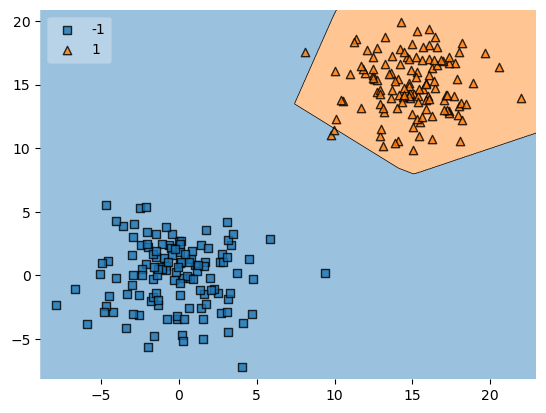

<Figure size 400x400 with 0 Axes>

In [10]:
plot_decision_regions(X_testing, Targets_testing, clf=model, legend=2)
plt.figure(figsize=(4, 4))
plt.show()

The model successfully classifies the two clusters into two classes.


### Multi-Class Classification


Similar to binary classification, let's create another data set with 1000 samples, and use 750 of those samples for training a simple CNN model.


Let us define a few more configuration options.


*   **num_samples**: refers to the total number of samples in our dataset
*   **test_split**: refers to the number of samples to be used for testing
*   **cluster_centers**: we define 3 centers for our isotropic Gaussian blobs
*   **num_classes**: we have 3 classes
*   **loss_function_used**: since this is a multi-class classification problem, we use categorical cross-entropy loss


In [11]:
num_samples = 1000
train_split = 250
cluster_centers = [(-10, 5), (0, 0), (10, 5)]
num_classes = len(cluster_centers)
loss_function_used = CategoricalCrossentropy(from_logits=True)

In [12]:
X_training, Targets_training, X_testing, Targets_testing= generate_multiclass_blobs(num_samples, train_split,
              cluster_centers, num_classes,
              loss_function_used)

Let's take a look at one of the samples.


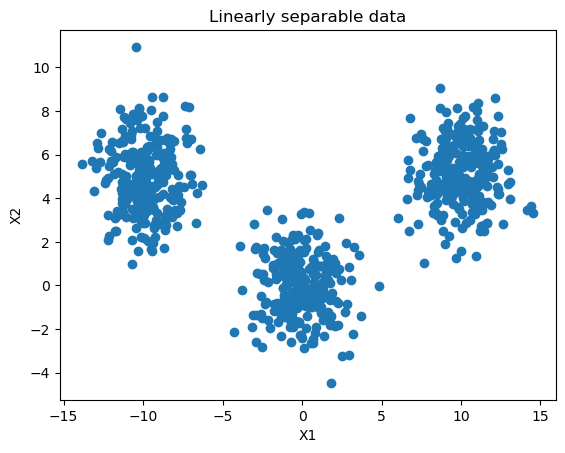

In [13]:
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We will build a simple CNN model with two hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function. Let's define the architecture of our model:


In [14]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/keras/backend.py:5535: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "categorical_crossentropy"


120/120 [==============================] - 2s 7ms/step - loss: 1.1398 - accuracy: 0.6467 - val_loss: 0.5451 - val_accuracy: 0.7533
Epoch 2/30
120/120 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.7967 - val_loss: 0.2315 - val_accuracy: 0.9267
Epoch 3/30
120/120 [==============================] - 0s 4ms/step - loss: 0.2085 - accuracy: 0.9450 - val_loss: 0.1622 - val_accuracy: 0.9667
Epoch 4/30
120/120 [==============================] - 1s 7ms/step - loss: 0.1557 - accuracy: 0.9750 - val_loss: 0.1241 - val_accuracy: 0.9800
Epoch 5/30
120/120 [==============================] - 1s 9ms/step - loss: 0.1137 - accuracy: 0.9867 - val_loss: 0.0785 - val_accuracy: 0.9867
Epoch 6/30
120/120 [==============================] - 1s 10ms/step - loss: 0.0715 - accuracy: 0.9950 - val_loss: 0.0514 - val_accuracy: 0.9933
Epoch 7/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9950 - val_loss: 0.0418 - val_accuracy: 0.9867
Epoch 8/30
120/1

We will now use the trained model to make predictions on an unseen test dataset.


In [16]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Test results - Loss: 0.0024399207904934883 - Accuracy: 100.0%


In [17]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

# fit keras_model
keras_model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 16s 2ms/step


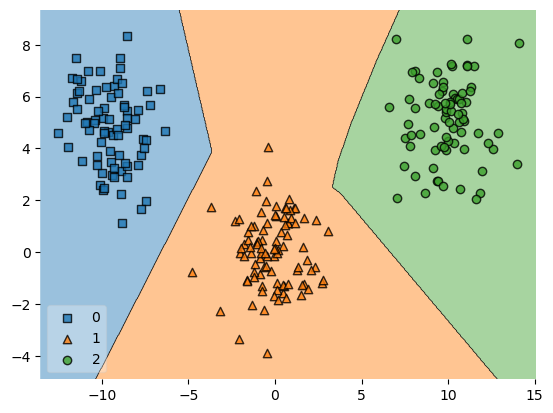

In [18]:
# Plot decision boundary
plot_decision_regions(X_testing, np.argmax(Targets_testing, axis=1), clf=keras_model_no_ohe, legend=3)
plt.show()

## Example: MNIST Hand-Written Digits


Let us first load our MNIST hand-written dataset using the Keras library.


In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [20]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Now we can plot some sample digits from the training set.


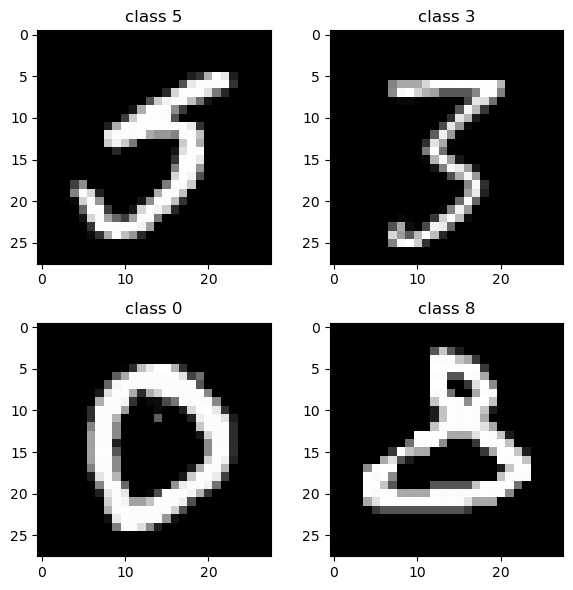

In [21]:
plt.rcParams['figure.figsize'] = (6,6) 

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))
    
plt.tight_layout()

Each image is on a grayscale (that is, only 1 channel) and is of size 28x28. We need to flatten each image by reshaping our matrix from 28x28 to a 784-length vector.


In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Next, we need to change integers to 32-bit floating point numbers. We would also need to normalize our input to be in the range [0, 1], rather than [0-255].


In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Our target variable, `y`, is an array of the following form:


In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The categorical cross-entropy function expects that we provide one-hot encoded representations of the labels and predictions. Let us one-hot encode our target, `y`, using the `OneHotEncoder()` function from sklearn.


In [25]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


In [26]:
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

In [27]:
y_test_enc.shape

(10000, 10)

In this multi-class classification task, we want to interpret our logistic regression model's results as a probability distribution; that is the model should output a vector that represents the probability of the given image belonging to each of the 10 classes. 

All elements in the vector should fall into the \[0,1] range and sum up to 1. In order to set up our classification problem this way, we can feed the model output to a softmax function to produce probabilities.


For training our multi-class logistic classifier, we need a loss function. Categorical cross-entropy is a loss function widely used with softmax. We need to minimize this loss function in order to determine an optimal set of parameters.


We will build a simple CNN model with two hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function. Let's define the architecture of our model:


In [28]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used=CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=2, batch_size=5, verbose=1, validation_split=0.2)


Epoch 1/2


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/keras/backend.py:5535: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "categorical_crossentropy"


9600/9600 [==============================] - 36s 4ms/step - loss: 0.5142 - accuracy: 0.8455 - val_loss: 0.3356 - val_accuracy: 0.9026
Epoch 2/2
9600/9600 [==============================] - 39s 4ms/step - loss: 0.3084 - accuracy: 0.9114 - val_loss: 0.2682 - val_accuracy: 0.9226


In [30]:
test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.9203
Test results - Loss: 0.27486953139305115 - Accuracy: 92.03000068664551%


## Example: Single-Digit House Number Recognition


Recognizing multi-digit text from photographs is a hard problem. In this example, we deal with a simpler sub-problem that involves using a convolutional neural network with the categorical cross-entropy loss function to build a classifier that identifies single-digit numbers from custom images.


First, let's load in a custom image using a URL. \[Image from [comforthouse](https://www.comforthouse.com/floating-1-number-sign.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01).]


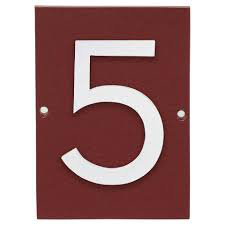

In [31]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/images/house_number_5.jpeg'
image = Image.open(urlopen(URL)).convert('RGB')
image

Let us define a CNN architecture that is similar to one used for MNIST hand-written digit classification. We use a softmax as the activation function and categorical cross-entropy as the loss function as this is a multi-class classification problem.


In [32]:
feature_vector_shape,input_shape = 784,784
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=2, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/2
9600/9600 [==============================] - 39s 4ms/step - loss: 0.4504 - accuracy: 0.8661 - val_loss: 0.2828 - val_accuracy: 0.9138
Epoch 2/2
9600/9600 [==============================] - 36s 4ms/step - loss: 0.2695 - accuracy: 0.9230 - val_loss: 0.2312 - val_accuracy: 0.9323


We must now pre-process our raw input images to be grayscale and 28x28 in size.


In [33]:
img_rows, img_cols = 28, 28
img = Image.fromarray(np.uint8(image)).convert('L')
img_gray = img.resize((img_rows, img_cols), Image.ANTIALIAS)
img_gray

We will now convert the image to an array, and reshape it such that it has a dimension of (1, 784).


In [34]:
arr = np.array(img_gray)
arr = arr.reshape((img_cols*img_rows))
arr = np.expand_dims(arr, axis=0)

Finally, we will feed the array as an input to our model, and use the argmax function to determine the most likely digit label.


In [35]:
prediction = model.predict(arr)
np.argmax(prediction)

1/1 [==============================] - 0s 66ms/step


3

We got it right! You are free to experiment with different custom images by simply changing the URL.


# Exercises


For these exercises, we will be using the Fashion-MNIST dataset. It consists of 60,000 28x28 grayscale training images and 10,000 test images for 10 different categories, listed below:


0.  T-shirt
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot


### Exercise 1 - Loading and plotting the images


Similar to the MNIST hand-written digits dataset, Fashion-MNIST is available for loading through Keras. Load the dataset using Keras in a similar manner. Plot some sample images from the training set.


4422102/4422102 [==============================] - 0s 0us/step


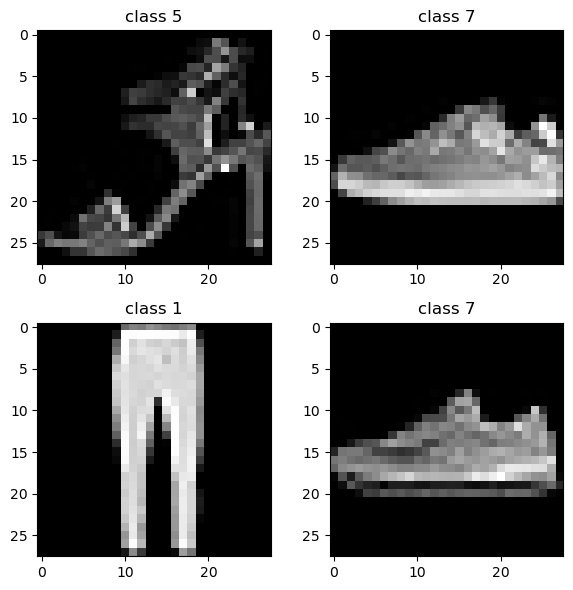

In [36]:
# Enter your solution here
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


plt.rcParams['figure.figsize'] = (6,6) 

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))
    
plt.tight_layout()

<details>
    <summary>Click here for Solution</summary>

```python
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


plt.rcParams['figure.figsize'] = (6,6) 

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))
    
plt.tight_layout()
```

</details>


### Exercise 2 - Preparing the data


Convert all grayscale images of size 28x28 to a 784-length vector. Change integers to 32-bit floating point numbers and normalize the input to be in the range \[0, 1], rather than \[0-255].


In [37]:
# Enter your solution here
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

(60000, 784)
(10000, 784)


<details>
    <summary>Click here for Solution</summary>

```python
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
```

</details>


### Exercise 3 - One-hot encoding


Create one-hot encoded representations of the target variable using the `OneHotEncoder()` function from sklearn.


In [38]:
# Enter your solution here
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


<details>
    <summary>Click here for Solution</summary>

```python
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))
```

</details>


### Exercise 4 - Build model architecture


Build a CNN model with 2 hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function.


In [40]:
# Enter your solution here

feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=2, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/2
9600/9600 [==============================] - 41s 4ms/step - loss: 0.6289 - accuracy: 0.7795 - val_loss: 0.5010 - val_accuracy: 0.8208
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.4704 - accuracy: 0.8348
Test results - Loss: 0.47040224075317383 - Accuracy: 83.48000049591064%


<details>
    <summary>Click here for Solution</summary>

```python
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


```

</details>


### (Optional) Exercise 5 - Sparse Categorical Cross Entropy


We saw that when using categorical cross-entropy, the ground truth labels need to be one-hot encoded. Keras provides another loss function called sparse cross-entropy where we can leave the labels as integers.

Build a CNN model with two hidden layers, that uses softmax as the activation function, and sparse categorical cross-entropy as the loss function. Make sure to use the non-one-hot encoded ground-truth labels.  


In [44]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = SparseCategoricalCrossentropy()

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/2
9600/9600 [==============================] - 37s 4ms/step - loss: 0.6700 - accuracy: 0.7640 - val_loss: 0.5094 - val_accuracy: 0.8206
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8258
Test results - Loss: 0.4934849739074707 - Accuracy: 82.58000016212463%


<details>
    <summary>Click here for Solution</summary>

```python
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = SparseCategoricalCrossentropy()

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

```

</details>


## References


Bishop, C., 2006. Pattern Recognition and Machine Learning.


## Authors


[Kopal Garg](https://www.linkedin.com/in/gargkopal/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2022-05-20|0.1|Kopal Garg|Create Lab|
|2022-09-06|0.1|Steve Hord|QA pass edits|


Copyright © 2022 IBM Corporation. All rights reserved.
